In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
titanic_train=pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test=pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

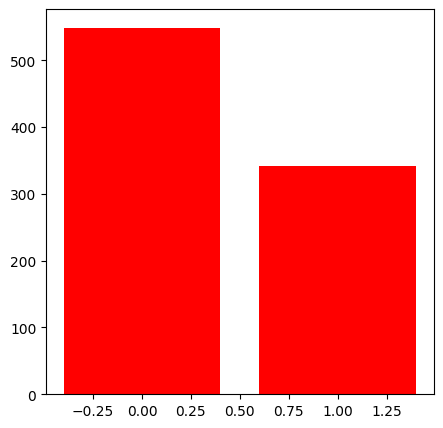

In [7]:
plt.figure(figsize=(5,5))
plt.bar(
    list(titanic_train['Survived'].value_counts().keys()),
    list(titanic_train['Survived'].value_counts()),
    color='r'
)
plt.show()

In [8]:
titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

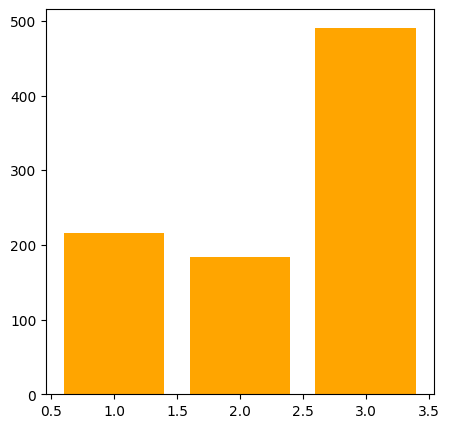

In [9]:
plt.figure(figsize=(5,5))
plt.bar(
    list(titanic_train['Pclass'].value_counts().keys()),
    list(titanic_train['Pclass'].value_counts()),
    color='Orange'
)
plt.show()

In [10]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

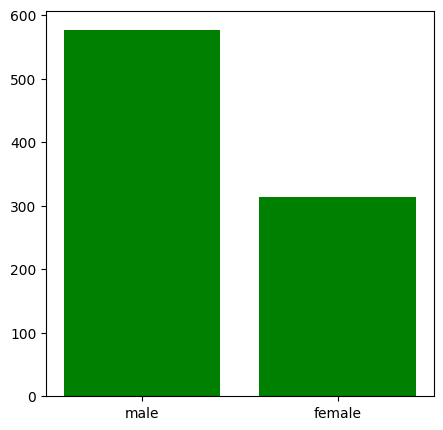

In [11]:
plt.figure(figsize=(5,5))
plt.bar(
    list(titanic_train['Sex'].value_counts().keys()),
    list(titanic_train['Sex'].value_counts()),
    color='Green'
)
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


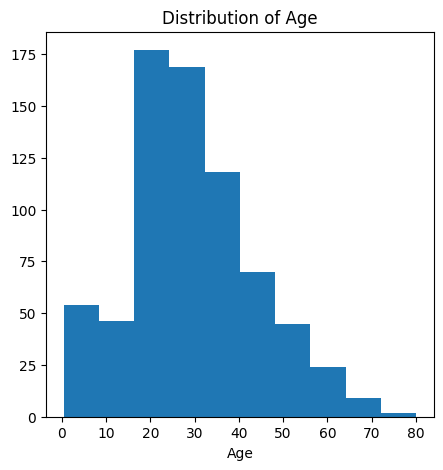

In [12]:
plt.figure(figsize=(5,5))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

In [13]:
(titanic_train['Survived'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [14]:
sum(titanic_train['Survived'].isnull())

0

In [15]:
titanic_train=titanic_train.dropna()

# Building Model


In [16]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtc=DecisionTreeClassifier()

In [19]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Predicting values

In [20]:
sum(titanic_test['Age'].isnull())

86

In [21]:
titanic_test=titanic_test.dropna()

In [22]:
sum(titanic_test['Age'].isnull())

0

In [23]:
x_test=titanic_test[['Age']]

In [24]:
y_pred=dtc.predict(x_test)

In [25]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])